#住宅価格の予測
Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。


House Prices: Advanced Regression Techniques | Kaggle

##【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。



In [160]:
import numpy as np

#google driveのモジュールをインポート
from google.colab import drive
#google driveのマウント
drive.mount('/content/drive')

csv_path = "drive/My Drive/DIVE INTO CODE/Week3/train.csv" # ファイル名（パス）を指定する

import pandas as pd
df = pd.read_csv(csv_path)

#print(df.columns)

#GrLivArea、YearBuilt、SalePrice列のみを抽出
df2 = df.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]

pd.set_option('display.max_rows', 150)    #最大表示行数を150にセット
pd.set_option('display.max_columns', 5)   #最大表示列数を5にセット

display(df2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


##【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation


評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。


sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

In [161]:
# データの外観を確認

print("df2.head():")
display(df2.head())
print("\n")
#df2.info()
print("df2.dtypes:\n{}".format(df2.dtypes))
print("\n")
print("df2.describe():\n{}".format(df2.describe()))
print("\n")
print("df2.isnull():\n{}".format(df2.isnull()))
print("\n")
print("df2.sum():\n{}".format(df2.sum()))
print("\n")
print("df2.isnull().sum():\n{}".format(df2.isnull().sum()))

df2.head():


,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000




df2.dtypes:
GrLivArea    int64
YearBuilt    int64
SalePrice    int64
dtype: object


df2.describe():
         GrLivArea    YearBuilt      SalePrice
count  1460.000000  1460.000000    1460.000000
mean   1515.463699  1971.267808  180921.195890
std     525.480383    30.202904   79442.502883
min     334.000000  1872.000000   34900.000000
25%    1129.500000  1954.000000  129975.000000
50%    1464.000000  1973.000000  163000.000000
75%    1776.750000  2000.000000  214000.000000
max    5642.000000  2010.000000  755000.000000


df2.isnull():
      GrLivArea  YearBuilt  SalePrice
0         False      False      False
1         False      False      False
2         False      False      False
3         False      False      False
4         False      False      False
...         ...        ...        ...
1455      False      False      False
1456      False      False      False
1457      False      False      False
1458      False      False      False
1459      False      False      False

[

'df2.corr():'

,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


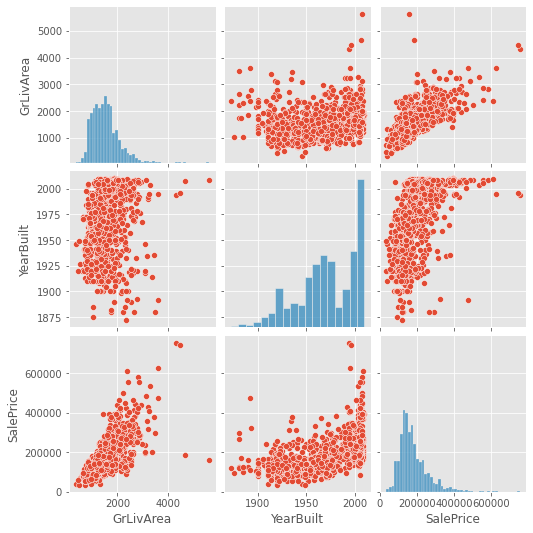

In [162]:
#相関行列
display("df2.corr():")
display(df2.corr())

#散布図行列を作成
import seaborn as sns
sns.pairplot(df2, diag_kind="hist")

# #相関行列のヒートマップを作成
# import matplotlib.pyplot as plt
# import matplotlib.style
# %matplotlib inline
# matplotlib.style.use('ggplot')

# fig1, ax1 = plt.subplots(figsize=(15, 10), dpi=50)

# ax1.set_title("heatmap")

# sns.heatmap(df2.corr(), ax=ax1, cmap='hot')   

# pd.set_option("display.max_rows", 100)   #行数が100以上の場合、表示を省略
# pd.set_option("display.max_columns", 100)  #列数が100以上の場合、表示を省略

In [163]:
import numpy as np
from sklearn.model_selection import train_test_split

np.set_printoptions(threshold=10000)    #ndarrayの要素の表示数上限を10000に設定
X_ndarray = np.array(df2.loc[:, ["GrLivArea", "YearBuilt"]])
y_ndarray = np.array(df2.loc[:, "SalePrice"])

# print(X_ndarray)
# print(y_ndarray)

#データセットを学習用と検証用に分割
X_train, X_test, y_train, y_test = train_test_split(X_ndarray, y_ndarray, random_state=0, test_size=0.25)
print("X_train")
print(X_train)
print("\n")
print("X_test")
print(X_test)
print("\n")
print("y_train")
print(y_train)
print("\n")
print("y_test")
print(y_test)



#標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
print("scaler.mean_:")
print(scaler.mean_)
print("scaler.var_:")
print(scaler.var_)

X_train_transformed = scaler.transform(X_train)    #標準化されたX_train
X_test_transformed = scaler.transform(X_test)     #標準化されたX_test



X_train
[[2372 1892]
 [1472 1991]
 [ 960 1965]
 [1838 2005]
 [1309 1974]
 [2643 2006]
 [1131 1941]
 [1960 1952]
 [1144 1963]
 [1056 1980]
 [ 693 1941]
 [1494 1997]
 [1646 2004]
 [ 864 1972]
 [1566 2008]
 [1395 1972]
 [1208 1925]
 [1513 1920]
 [1367 1931]
 [ 955 1966]
 [1077 1922]
 [1056 1955]
 [1553 2005]
 [1614 2005]
 [2042 2008]
 [1073 1921]
 [1285 1948]
 [2117 1970]
 [ 605 1920]
 [1150 1959]
 [1456 2005]
 [ 999 1961]
 [1500 2005]
 [1336 1953]
 [1593 2004]
 [2184 2008]
 [1560 2003]
 [1644 1942]
 [ 630 1970]
 [1113 1976]
 [2172 2006]
 [1346 1910]
 [2610 2007]
 [1958 2005]
 [1468 2008]
 [1734 1977]
 [1200 1946]
 [1550 2006]
 [2230 1912]
 [1639 1936]
 [ 864 1958]
 [1621 1984]
 [ 987 1972]
 [2519 1989]
 [1365 1970]
 [2290 2002]
 [2596 2006]
 [ 907 1957]
 [1456 1976]
 [1190 1962]
 [ 858 1971]
 [2223 1973]
 [1005 1955]
 [1895 1994]
 [1040 1965]
 [1264 1960]
 [1761 2007]
 [1034 1976]
 [1363 1954]
 [1689 1956]
 [2113 1995]
 [1573 2002]
 [2364 2009]
 [2034 1997]
 [1291 1996]
 [ 858 1958]
 [12

###線形単回帰(SalePrice - GrLivArea)###
reg.coef_
[57025.95424038]
reg.intercept_
180733.1497716895
y_predict:
[290472.49909971 187008.27419701 145600.50008974 ... 181155.97545652
 186235.32908034 100659.26259198]
y_test(true):
[200624 133000 110000 ... 235000 239000  85000]
mean_squared_error(y_test, y_predict)   #MSE
3705065901.949674
mean_squared_error(y_test, y_predict, squared=False)   #RMSE
60869.25251676477


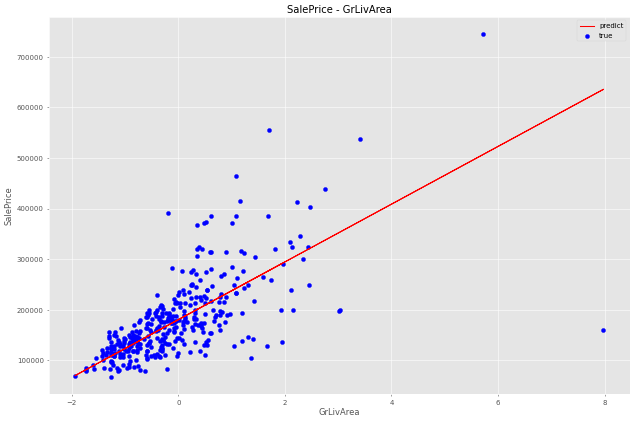

In [164]:
###線形単回帰###
print("###線形単回帰(SalePrice - GrLivArea)###")
from sklearn.linear_model import LinearRegression
X = X_train_transformed[:, 0].reshape(-1, 1)
y = y_train

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を100に設定

#学習・予測
reg = LinearRegression().fit(X, y)
# print("reg.score(X, y)")
# print(reg.score(X, y))
print("reg.coef_")    # 説明変数の係数(傾き)
print(reg.coef_)    # 説明変数の係数(傾き)
print("reg.intercept_")   # 切片
print(reg.intercept_)   # 切片
y_predict = reg.predict(X_test_transformed[:, 0].reshape(-1, 1))

print("y_predict:")
print(y_predict)

print("y_test(true):")
print(y_test)


#評価
from sklearn.metrics import mean_squared_error
print("mean_squared_error(y_test, y_predict)   #MSE")
print(mean_squared_error(y_test, y_predict))   #MSE
print("mean_squared_error(y_test, y_predict, squared=False)   #RMSE")
print(mean_squared_error(y_test, y_predict, squared=False))   #RMSE

#予測値と実測値をプロット
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')

fig2, ax2 = plt.subplots(figsize=(15, 10), dpi=50)

ax2.set_title("SalePrice - GrLivArea")
ax2.set_xlabel("GrLivArea")
ax2.set_ylabel("SalePrice")
ax2.scatter(X_test_transformed[:, 0], y_test, c="blue", cmap='Blues', label="true")
ax2.plot(X_test_transformed[:, 0], y_predict, color = "red", label="predict")
ax2.legend(loc='best') # 凡例を最適位置に表示

###線形重回帰###
reg.coef_
[50915.49019418 31435.11963558]
reg.intercept_
180733.1497716894
y_predict:
[264130.40861155 155093.63716252 127493.47870881 ... 211298.41331189
 223121.80593696  45720.35056089]
y_test(true):
[200624 133000 110000 ... 235000 239000  85000]
mean_scored_error(RMSE):
52210.22983155349


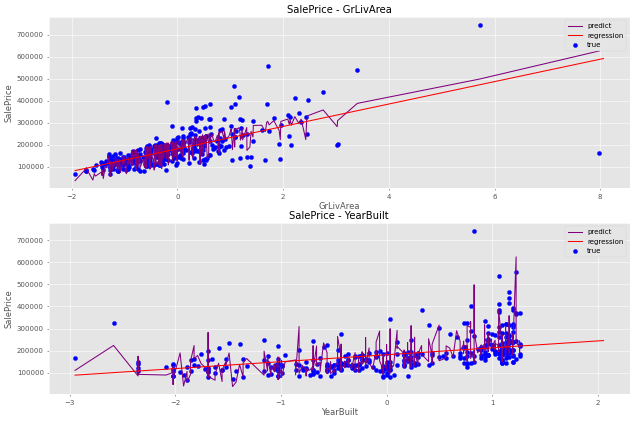

In [165]:
###線形重回帰###
print("###線形重回帰###")
from sklearn.linear_model import LinearRegression
X = X_train_transformed
y = y_train

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を100に設定

#学習・予測
reg = LinearRegression().fit(X, y)
# print("reg.score(X, y)")
# print(reg.score(X, y))
print("reg.coef_")    # 説明変数の係数(傾き)
print(reg.coef_)    # 説明変数の係数(傾き)
print("reg.intercept_")   # 切片
print(reg.intercept_)   # 切片
y_predict = reg.predict(X_test_transformed)

print("y_predict:")
print(y_predict)

print("y_test(true):")
print(y_test)


#評価
from sklearn.metrics import mean_squared_error
# print("mean_squared_error(y_test, y_predict)   #MSE")
# print(mean_squared_error(y_test, y_predict))   #MSE
# print("mean_squared_error(y_test, y_predict, squared=False)   #RMSE")
# print(mean_squared_error(y_test, y_predict, squared=False))   #RMSE
mean_scored_error_linear = mean_squared_error(y_test, y_predict, squared=False)   #RMSE
print("mean_scored_error(RMSE):")
print(mean_scored_error_linear)

#予測値と実測値をプロット
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')

fig3, ax3 = plt.subplots(2, figsize=(15, 10), dpi=50)

ax3[0].set_title("SalePrice - GrLivArea")
ax3[0].set_xlabel("GrLivArea")
ax3[0].set_ylabel("SalePrice")
ax3[1].set_title("SalePrice - YearBuilt")
ax3[1].set_xlabel("YearBuilt")
ax3[1].set_ylabel("SalePrice")

#実測値をプロット（散布図）
ax3[0].scatter(X_test_transformed[:, 0], y_test, c="blue", cmap='Blues', label="true")
ax3[1].scatter(X_test_transformed[:, 1], y_test, c="blue", cmap='Blues', label="true")

#予測値をプロット（折れ線）
X_y_ndarray = np.concatenate([X_test_transformed, y_predict.reshape(-1, 1)], axis=1)
X_y_sort_col0_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 0])]  #0列目(X1)でソート
X_y_sort_col1_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 1])]  #1列目(X2)でソート
ax3[0].plot(X_y_sort_col0_ndarray[:, 0], X_y_sort_col0_ndarray[:, 2], color = "purple", label="predict")
ax3[0].legend(loc='best') # 凡例を最適位置に表示
ax3[1].plot(X_y_sort_col1_ndarray[:, 1], X_y_sort_col1_ndarray[:, 2], color = "purple", label="predict")
ax3[1].legend(loc='best') # 凡例を最適位置に表示

#回帰直線を作成
X1 = np.arange(np.min(X_test_transformed[:, 0]), np.max(X_test_transformed[:, 0]) + 1, 1)
y_predict_regression = reg.coef_[0] * X1 + reg.intercept_
ax3[0].plot(X1, y_predict_regression, color = "red", label="regression")
ax3[0].legend(loc='best') # 凡例を最適位置に表示
X2 = np.arange(np.min(X_test_transformed[:, 1]), np.max(X_test_transformed[:, 1]) + 1, 1)
y_predict_regression = reg.coef_[1] * X2 + reg.intercept_
ax3[1].plot(X2, y_predict_regression, color = "red", label="regression")
ax3[1].legend(loc='best') # 凡例を最適位置に表示

plt.show()

##【問題3】手法の比較
以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

###SVM###
reg.coef_
[[41520.23941103 25502.48853473]]
reg.intercept_
[175251.49641652]
y_predict:
[243321.00885177 154474.3625071  131927.80587689 ... 200049.879022
 209660.93417227  65418.88915781]
y_test(true):
[200624 133000 110000 ... 235000 239000  85000]
mean_scored_error(RMSE):
52819.14845842726


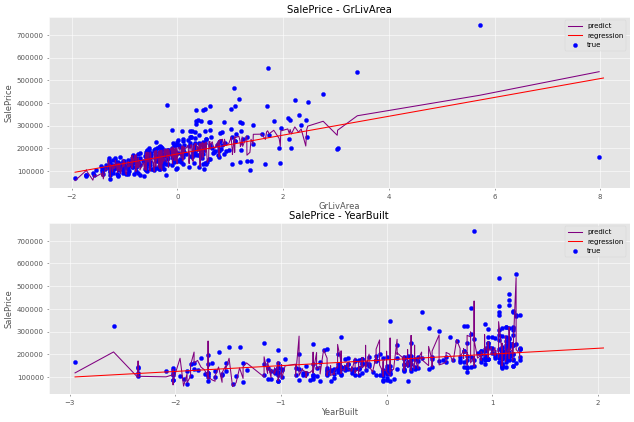

In [166]:
###SVM###
print("###SVM###")

X = X_train_transformed
y = y_train

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を100に設定

#学習・予測
from sklearn.svm import SVR

# regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
reg = SVR(kernel="linear", C=1000, epsilon=0.1)   #カーネル関数：線形、正則化項C：1000、スラック変数：0.2
reg.fit(X, y)

print("reg.coef_")    # 説明変数の係数(傾き)
print(reg.coef_)    # 説明変数の係数(傾き)
print("reg.intercept_")   # 切片
print(reg.intercept_)   # 切片
y_predict = reg.predict(X_test_transformed)

print("y_predict:")
print(y_predict)

print("y_test(true):")
print(y_test)


#評価
from sklearn.metrics import mean_squared_error
mean_scored_error_SVM = mean_squared_error(y_test, y_predict, squared=False)   #RMSE
print("mean_scored_error(RMSE):")
print(mean_scored_error_SVM)

#予測値と実測値をプロット
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')

fig3, ax3 = plt.subplots(2, figsize=(15, 10), dpi=50)

ax3[0].set_title("SalePrice - GrLivArea")
ax3[0].set_xlabel("GrLivArea")
ax3[0].set_ylabel("SalePrice")
ax3[1].set_title("SalePrice - YearBuilt")
ax3[1].set_xlabel("YearBuilt")
ax3[1].set_ylabel("SalePrice")

#実測値をプロット（散布図）
ax3[0].scatter(X_test_transformed[:, 0], y_test, c="blue", cmap='Blues', label="true")
ax3[1].scatter(X_test_transformed[:, 1], y_test, c="blue", cmap='Blues', label="true")

#予測値をプロット（折れ線）
X_y_ndarray = np.concatenate([X_test_transformed, y_predict.reshape(-1, 1)], axis=1)
X_y_sort_col0_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 0])]  #0列目(X1)でソート
X_y_sort_col1_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 1])]  #1列目(X2)でソート
ax3[0].plot(X_y_sort_col0_ndarray[:, 0], X_y_sort_col0_ndarray[:, 2], color = "purple", label="predict")
ax3[0].legend(loc='best') # 凡例を最適位置に表示
ax3[1].plot(X_y_sort_col1_ndarray[:, 1], X_y_sort_col1_ndarray[:, 2], color = "purple", label="predict")
ax3[1].legend(loc='best') # 凡例を最適位置に表示

#回帰直線を作成
X1 = np.arange(np.min(X_test_transformed[:, 0]), np.max(X_test_transformed[:, 0]) + 1, 1)
y_predict_regression = reg.coef_[0, 0] * X1 + reg.intercept_
ax3[0].plot(X1, y_predict_regression, color = "red", label="regression")
ax3[0].legend(loc='best') # 凡例を最適位置に表示
X2 = np.arange(np.min(X_test_transformed[:, 1]), np.max(X_test_transformed[:, 1]) + 1, 1)
y_predict_regression = reg.coef_[0, 1] * X2 + reg.intercept_
ax3[1].plot(X2, y_predict_regression, color = "red", label="regression")
ax3[1].legend(loc='best') # 凡例を最適位置に表示

plt.show()

###決定木###
y_predict:
[191000. 174500. 125000. ... 177000. 264561.  55000.]
y_test(true):
[200624 133000 110000 ... 235000 239000  85000]
mean_scored_error(RMSE):
53958.77918132616


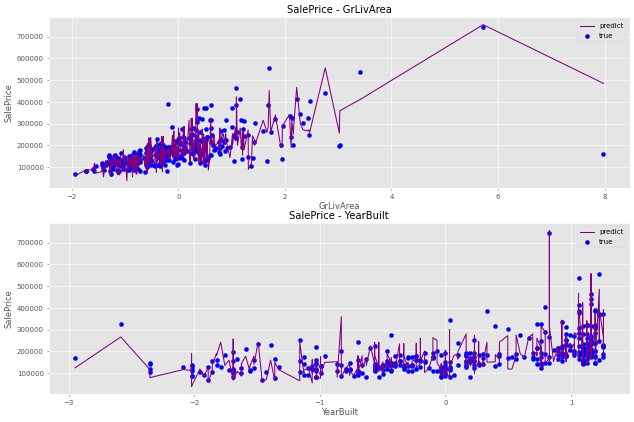

In [167]:
###決定木###
print("###決定木###")

X = X_train_transformed
y = y_train

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を100に設定

#学習・予測
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X, y)

y_predict = reg.predict(X_test_transformed)

print("y_predict:")
print(y_predict)

print("y_test(true):")
print(y_test)


#評価
from sklearn.metrics import mean_squared_error
mean_scored_error_decision_tree = mean_squared_error(y_test, y_predict, squared=False)   #RMSE
print("mean_scored_error(RMSE):")
print(mean_scored_error_decision_tree)

#予測値と実測値をプロット
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')

fig3, ax3 = plt.subplots(2, figsize=(15, 10), dpi=50)

ax3[0].set_title("SalePrice - GrLivArea")
ax3[0].set_xlabel("GrLivArea")
ax3[0].set_ylabel("SalePrice")
ax3[1].set_title("SalePrice - YearBuilt")
ax3[1].set_xlabel("YearBuilt")
ax3[1].set_ylabel("SalePrice")

#実測値をプロット（散布図）
ax3[0].scatter(X_test_transformed[:, 0], y_test, c="blue", cmap='Blues', label="true")
ax3[1].scatter(X_test_transformed[:, 1], y_test, c="blue", cmap='Blues', label="true")

#予測値をプロット（折れ線）
X_y_ndarray = np.concatenate([X_test_transformed, y_predict.reshape(-1, 1)], axis=1)
X_y_sort_col0_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 0])]  #0列目(X1)でソート
X_y_sort_col1_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 1])]  #1列目(X2)でソート
ax3[0].plot(X_y_sort_col0_ndarray[:, 0], X_y_sort_col0_ndarray[:, 2], color = "purple", label="predict")
ax3[0].legend(loc='best') # 凡例を最適位置に表示
ax3[1].plot(X_y_sort_col1_ndarray[:, 1], X_y_sort_col1_ndarray[:, 2], color = "purple", label="predict")
ax3[1].legend(loc='best') # 凡例を最適位置に表示

plt.show()

###ランダムフォレスト###
y_predict:
[192204.   141963.66 126659.   ... 188796.   255469.86  56165.  ]
y_test(true):
[200624 133000 110000 ... 235000 239000  85000]
mean_scored_error(RMSE):
43762.11228126812


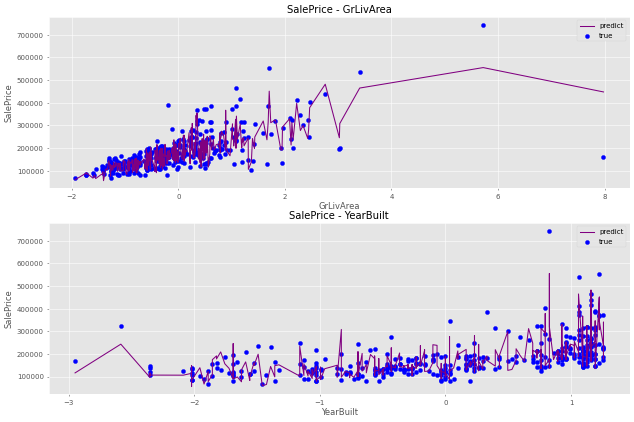

In [168]:
###ランダムフォレスト###
print("###ランダムフォレスト###")

X = X_train_transformed
y = y_train

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を100に設定

#学習・予測
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state=0)
reg.fit(X, y)


y_predict = reg.predict(X_test_transformed)

print("y_predict:")
print(y_predict)

print("y_test(true):")
print(y_test)


#評価
from sklearn.metrics import mean_squared_error
mean_scored_error_random_forest = mean_squared_error(y_test, y_predict, squared=False)   #RMSE
print("mean_scored_error(RMSE):")
print(mean_scored_error_random_forest)

#予測値と実測値をプロット
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')

fig3, ax3 = plt.subplots(2, figsize=(15, 10), dpi=50)

ax3[0].set_title("SalePrice - GrLivArea")
ax3[0].set_xlabel("GrLivArea")
ax3[0].set_ylabel("SalePrice")
ax3[1].set_title("SalePrice - YearBuilt")
ax3[1].set_xlabel("YearBuilt")
ax3[1].set_ylabel("SalePrice")

#実測値をプロット（散布図）
ax3[0].scatter(X_test_transformed[:, 0], y_test, c="blue", cmap='Blues', label="true")
ax3[1].scatter(X_test_transformed[:, 1], y_test, c="blue", cmap='Blues', label="true")

#予測値をプロット（折れ線）
X_y_ndarray = np.concatenate([X_test_transformed, y_predict.reshape(-1, 1)], axis=1)
X_y_sort_col0_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 0])]  #0列目(X1)でソート
X_y_sort_col1_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 1])]  #1列目(X2)でソート
ax3[0].plot(X_y_sort_col0_ndarray[:, 0], X_y_sort_col0_ndarray[:, 2], color = "purple", label="predict")
ax3[0].legend(loc='best') # 凡例を最適位置に表示
ax3[1].plot(X_y_sort_col1_ndarray[:, 1], X_y_sort_col1_ndarray[:, 2], color = "purple", label="predict")
ax3[1].legend(loc='best') # 凡例を最適位置に表示

plt.show()

In [169]:
#各回帰の評価指標値を表に記入
 
score_ndarray = np.array([mean_scored_error_linear,
                          mean_scored_error_SVM,
                          mean_scored_error_decision_tree,
                          mean_scored_error_random_forest]).reshape(4, 1)
df_score = pd.DataFrame(score_ndarray, index=["LinearRegression", "SVM", "DecisionTree", "RandomForest"], columns=["RMSE"])

display(df_score)

,RMSE
LinearRegression,52210.229832
SVM,52819.148458
DecisionTree,53958.779181
RandomForest,43762.112281


###【問題3 解答】
      上表から各線形回帰の評価指標値（RMSE）を見比べたところ、ランダムフォレストの指標値が最も小さく、比較的高い精度が得られた。
      しかし、今回は各回帰モデルのハイパーパラメータをあまり調整していない状態で評価したため、調整することで精度が改善される可能性あり。

##【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。


KaggleのNotebooksも参考にできます。

'df2.corr():'

,GrLivArea,YearBuilt,OverallQual,SalePrice
GrLivArea,1.000000,0.199010,0.593007,0.708624
YearBuilt,0.199010,1.000000,0.572323,0.522897
OverallQual,0.593007,0.572323,1.000000,0.790982
SalePrice,0.708624,0.522897,0.790982,1.000000


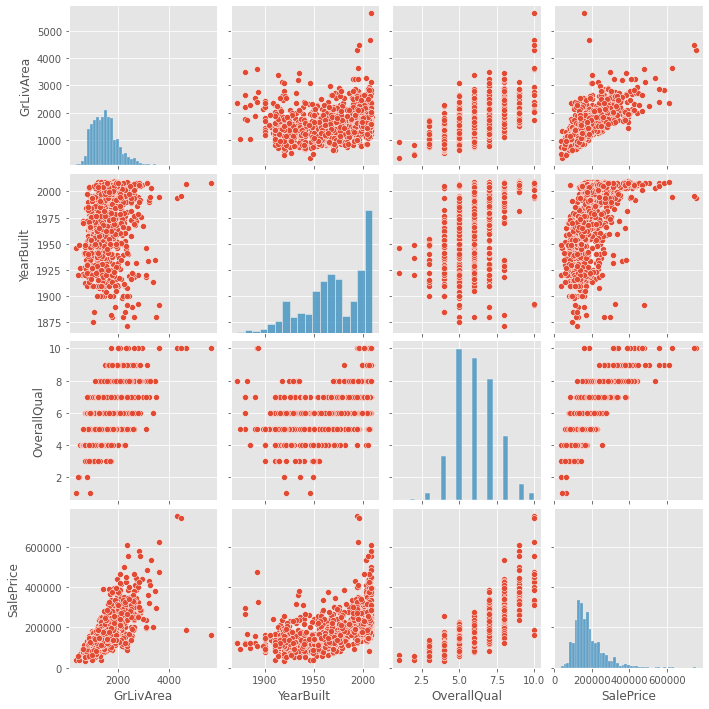

In [173]:
#GrLivArea、YearBuilt、SalePrice列のみを抽出
df2 = df.loc[:, ["GrLivArea", "YearBuilt", "OverallQual", "SalePrice"]]

# # データの外観を確認
# print("df2.head():")
# display(df2.head())
# print("\n")
# #df2.info()
# print("df2.dtypes:\n{}".format(df2.dtypes))
# print("\n")
# print("df2.describe():\n{}".format(df2.describe()))
# print("\n")
# print("df2.isnull():\n{}".format(df2.isnull()))
# print("\n")
# print("df2.sum():\n{}".format(df2.sum()))
# print("\n")
# print("df2.isnull().sum():\n{}".format(df2.isnull().sum()))

#相関行列
display("df2.corr():")
display(df2.corr())

#散布図行列を作成
import seaborn as sns
sns.pairplot(df2, diag_kind="hist")

In [177]:
import numpy as np
from sklearn.model_selection import train_test_split

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を100に設定
X_ndarray = np.array(df2.loc[:, ["GrLivArea", "YearBuilt", "OverallQual"]])
y_ndarray = np.array(df2.loc[:, "SalePrice"])

# print(X_ndarray)
# print(y_ndarray)

#データセットを学習用と検証用に分割
X_train, X_test, y_train, y_test = train_test_split(X_ndarray, y_ndarray, random_state=0, test_size=0.25)
print("X_train")
print(X_train)
print("\n")
print("X_test")
print(X_test)
print("\n")
print("y_train")
print(y_train)
print("\n")
print("y_test")
print(y_test)



#標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
print("scaler.mean_:")
print(scaler.mean_)
print("scaler.var_:")
print(scaler.var_)

X_train_transformed = scaler.transform(X_train)    #標準化されたX_train
X_test_transformed = scaler.transform(X_test)     #標準化されたX_test

print("X_train_transformed:")
print(X_train_transformed)
print("X_test_transformed:")
print(X_test_transformed)

X_train
[[2372 1892    5]
 [1472 1991    7]
 [ 960 1965    4]
 ...
 [1902 1978    6]
 [1557 2003    7]
 [1839 1998    7]]


X_test
[[2515 1957    6]
 [1578 1941    6]
 [1203 1950    5]
 ...
 [1525 2000    7]
 [1571 2007    8]
 [ 796 1910    5]]


y_train
[107500 160000 145000 ... 112000 234000 221000]


y_test
[200624 133000 110000 ... 235000 239000  85000]
scaler.mean_:
[1521.17077626 1971.00639269    6.07123288]
scaler.var_:
[2.66712817e+05 9.11535119e+02 1.85611309e+00]
X_train_transformed:
[[ 1.64748115 -2.61683012 -0.78628805]
 [-0.09521056  0.6622233   0.68171777]
 [-1.08660851 -0.19894225 -1.52029096]
 ...
 [ 0.73740881  0.23164052 -0.05228514]
 [ 0.06937699  1.05968432  0.68171777]
 [ 0.61542039  0.89407556  0.68171777]]
X_test_transformed:
[[ 1.9243755  -0.46391626 -0.05228514]
 [ 0.1100398  -0.99386429 -0.05228514]
 [-0.61608175 -0.69576852 -0.78628805]
 ...
 [ 0.00741462  0.96031906  0.68171777]
 [ 0.09648553  1.19217132  1.41572069]
 [-1.40416567 -2.02063859 -0.78628805]]


###線形重回帰###
reg.coef_
[34875.57345868 15677.35766147 32494.45085738]
reg.intercept_
180733.14977168944
y_predict:
[238874.89093017 167290.70799699 122789.13501986 ... 218199.04892844
 248791.30037941  74533.7944966 ]
y_test(true):
[200624 133000 110000 ... 235000 239000  85000]
mean_scored_error(RMSE):
44557.18876696402


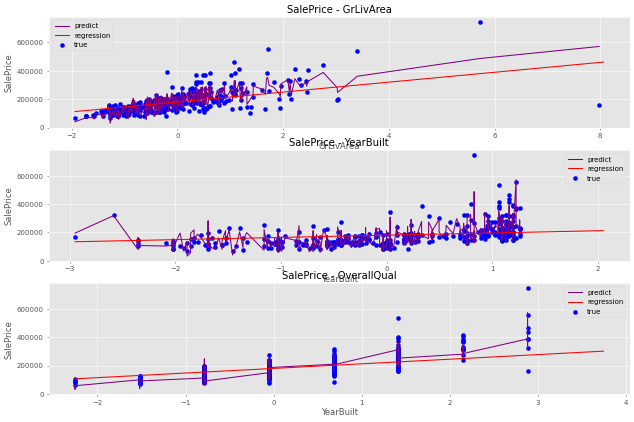

In [181]:
###線形重回帰###
print("###線形重回帰###")
from sklearn.linear_model import LinearRegression
X = X_train_transformed
y = y_train

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を100に設定

#学習・予測
reg = LinearRegression().fit(X, y)
# print("reg.score(X, y)")
# print(reg.score(X, y))
print("reg.coef_")    # 説明変数の係数(傾き)
print(reg.coef_)    # 説明変数の係数(傾き)
print("reg.intercept_")   # 切片
print(reg.intercept_)   # 切片
y_predict = reg.predict(X_test_transformed)

print("y_predict:")
print(y_predict)

print("y_test(true):")
print(y_test)


#評価
from sklearn.metrics import mean_squared_error
mean_scored_error_linear = mean_squared_error(y_test, y_predict, squared=False)   #RMSE
print("mean_scored_error(RMSE):")
print(mean_scored_error_linear)

#予測値と実測値をプロット
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')

fig3, ax3 = plt.subplots(3, figsize=(15, 10), dpi=50)

ax3[0].set_title("SalePrice - GrLivArea")
ax3[0].set_xlabel("GrLivArea")
ax3[0].set_ylabel("SalePrice")
ax3[1].set_title("SalePrice - YearBuilt")
ax3[1].set_xlabel("YearBuilt")
ax3[1].set_ylabel("SalePrice")
ax3[2].set_title("SalePrice - OverallQual")
ax3[2].set_xlabel("YearBuilt")
ax3[2].set_ylabel("SalePrice")

#実測値をプロット（散布図）
ax3[0].scatter(X_test_transformed[:, 0], y_test, c="blue", cmap='Blues', label="true")
ax3[1].scatter(X_test_transformed[:, 1], y_test, c="blue", cmap='Blues', label="true")
ax3[2].scatter(X_test_transformed[:, 2], y_test, c="blue", cmap='Blues', label="true")

#予測値をプロット（折れ線）
X_y_ndarray = np.concatenate([X_test_transformed, y_predict.reshape(-1, 1)], axis=1)
X_y_sort_col0_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 0])]  #0列目(X1)でソート
X_y_sort_col1_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 1])]  #1列目(X2)でソート
X_y_sort_col2_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 2])]  #1列目(X3)でソート
ax3[0].plot(X_y_sort_col0_ndarray[:, 0], X_y_sort_col0_ndarray[:, 3], color = "purple", label="predict")
ax3[0].legend(loc='best') # 凡例を最適位置に表示
ax3[1].plot(X_y_sort_col1_ndarray[:, 1], X_y_sort_col1_ndarray[:, 3], color = "purple", label="predict")
ax3[1].legend(loc='best') # 凡例を最適位置に表示
ax3[2].plot(X_y_sort_col2_ndarray[:, 2], X_y_sort_col2_ndarray[:, 3], color = "purple", label="predict")
ax3[2].legend(loc='best') # 凡例を最適位置に表示

#回帰直線を作成
X1 = np.arange(np.min(X_test_transformed[:, 0]), np.max(X_test_transformed[:, 0]) + 1, 1)
y_predict_regression = reg.coef_[0] * X1 + reg.intercept_
ax3[0].plot(X1, y_predict_regression, color = "red", label="regression")
ax3[0].legend(loc='best') # 凡例を最適位置に表示
X2 = np.arange(np.min(X_test_transformed[:, 1]), np.max(X_test_transformed[:, 1]) + 1, 1)
y_predict_regression = reg.coef_[1] * X2 + reg.intercept_
ax3[1].plot(X2, y_predict_regression, color = "red", label="regression")
ax3[1].legend(loc='best') # 凡例を最適位置に表示
X3 = np.arange(np.min(X_test_transformed[:, 2]), np.max(X_test_transformed[:, 2]) + 1, 1)
y_predict_regression = reg.coef_[2] * X3 + reg.intercept_
ax3[2].plot(X3, y_predict_regression, color = "red", label="regression")
ax3[2].legend(loc='best') # 凡例を最適位置に表示

plt.show()

###ランダムフォレスト###
y_predict:
[204615.6  139438.   125253.5  ... 237908.   257916.22  93085.8 ]
y_test(true):
[200624 133000 110000 ... 235000 239000  85000]
mean_scored_error(RMSE):
36920.15163736954


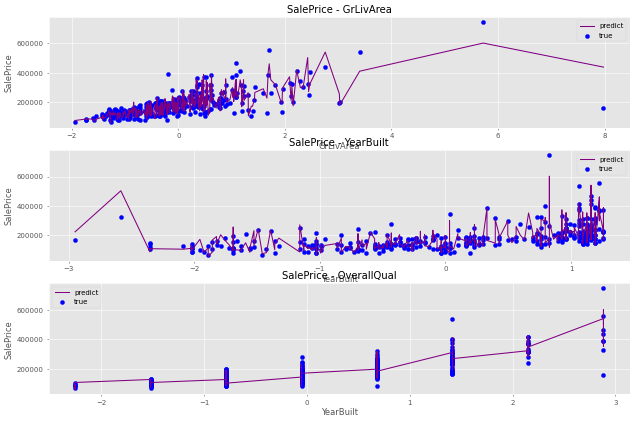

In [180]:
###ランダムフォレスト###
print("###ランダムフォレスト###")

X = X_train_transformed
y = y_train

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を100に設定

#学習・予測
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state=0)
reg.fit(X, y)


y_predict = reg.predict(X_test_transformed)

print("y_predict:")
print(y_predict)

print("y_test(true):")
print(y_test)


#評価
from sklearn.metrics import mean_squared_error
mean_scored_error_random_forest = mean_squared_error(y_test, y_predict, squared=False)   #RMSE
print("mean_scored_error(RMSE):")
print(mean_scored_error_random_forest)

#予測値と実測値をプロット
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')

fig3, ax3 = plt.subplots(3, figsize=(15, 10), dpi=50)

ax3[0].set_title("SalePrice - GrLivArea")
ax3[0].set_xlabel("GrLivArea")
ax3[0].set_ylabel("SalePrice")
ax3[1].set_title("SalePrice - YearBuilt")
ax3[1].set_xlabel("YearBuilt")
ax3[1].set_ylabel("SalePrice")
ax3[2].set_title("SalePrice - OverallQual")
ax3[2].set_xlabel("YearBuilt")
ax3[2].set_ylabel("SalePrice")

#実測値をプロット（散布図）
ax3[0].scatter(X_test_transformed[:, 0], y_test, c="blue", cmap='Blues', label="true")
ax3[1].scatter(X_test_transformed[:, 1], y_test, c="blue", cmap='Blues', label="true")
ax3[2].scatter(X_test_transformed[:, 2], y_test, c="blue", cmap='Blues', label="true")

#予測値をプロット（折れ線）
X_y_ndarray = np.concatenate([X_test_transformed, y_predict.reshape(-1, 1)], axis=1)
X_y_sort_col0_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 0])]  #0列目(X1)でソート
X_y_sort_col1_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 1])]  #1列目(X2)でソート
X_y_sort_col2_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 2])]  #1列目(X3)でソート
ax3[0].plot(X_y_sort_col0_ndarray[:, 0], X_y_sort_col0_ndarray[:, 3], color = "purple", label="predict")
ax3[0].legend(loc='best') # 凡例を最適位置に表示
ax3[1].plot(X_y_sort_col1_ndarray[:, 1], X_y_sort_col1_ndarray[:, 3], color = "purple", label="predict")
ax3[1].legend(loc='best') # 凡例を最適位置に表示
ax3[2].plot(X_y_sort_col2_ndarray[:, 2], X_y_sort_col2_ndarray[:, 3], color = "purple", label="predict")
ax3[2].legend(loc='best') # 凡例を最適位置に表示

plt.show()

In [185]:
#各回帰の評価指標値を表に記入
df_score2 = df_score.loc["LinearRegression(Feature x3)"] = mean_scored_error_linear
df_score2 = df_score.loc["RandomForest(Feature x3)"] = mean_scored_error_random_forest

display(df_score)

,RMSE
LinearRegression,52210.229832
SVM,52819.148458
DecisionTree,53958.779181
RandomForest,43762.112281
LinearRegression(Feature x3),44557.188767
RandomForest(Feature x3),36920.151637


###【問題4 解答】
      説明変数を２→３個に増やしたことで、RMSEが小さくなり、予測精度が向上した。
      しかし、まだ十分な予測精度が得られたとは言えないため、他のアプローチが必要である。